Enter the number of nodes: 4
Enter node 1: A
Enter node 2: B
Enter node 3: C
Enter node 4: D
Enter the number of edges: 4
Enter edge 1 (format: node1 node2): A B
Enter edge 2 (format: node1 node2): A C
Enter edge 3 (format: node1 node2): B D
Enter edge 4 (format: node1 node2): C D
Enter the number of colors: 3
Enter color 1: RED
Enter color 2: BLUE
Enter color 3: GREEN
Node coloring:
A: RED
B: BLUE
C: BLUE
D: RED


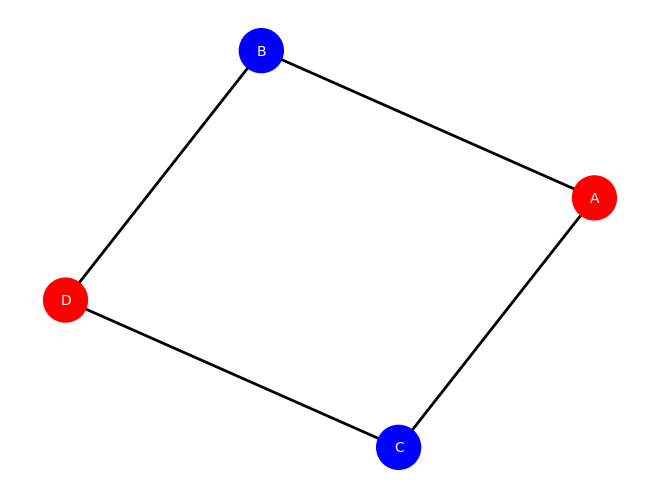

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def get_graph_from_user():
    num_nodes = int(input("Enter the number of nodes: "))
    nodes = []
    for i in range(num_nodes):
        node = input(f"Enter node {i+1}: ")
        nodes.append(node)

    num_edges = int(input("Enter the number of edges: "))
    edges = []
    for i in range(num_edges):
        edge = input(f"Enter edge {i+1} (format: node1 node2): ").split()
        edges.append(tuple(edge))
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    return G

def get_colors_from_user():
    num_colors = int(input("Enter the number of colors: "))
    colors = []
    for i in range(num_colors):
        color = input(f"Enter color {i+1}: ")
        colors.append(color)
    return colors

def is_safe(node, color, colored_nodes, G):
    for neighbor in G.neighbors(node):
        if neighbor in colored_nodes and colored_nodes[neighbor] == color:
            return False
    return True
def color_map(G, colors):
    colored_nodes = {}
    for node in G.nodes():
        for color in colors:
            if is_safe(node, color, colored_nodes, G):
                colored_nodes[node] = color
                break
        else:
            return None
    return colored_nodes

def main():
    G = get_graph_from_user()
    colors = get_colors_from_user()
    colored_nodes = color_map(G, colors)

    if colored_nodes is None:
        print("Insufficient colors to color the graph.")
    else:
        print("Node coloring:")
        for node, color in colored_nodes.items():
            print(f"{node}: {color}")
        pos = nx.spring_layout(G)
        node_colors = [colored_nodes[node] for node in G.nodes()]
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_size=10, font_color='white', edge_color='black', width=2)
        plt.show()

if __name__ == "__main__":
    main()
